In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
data = pd.read_csv("olympics.csv")

In [6]:
# Displaying the first 5 rows of the dataset
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
# Displaying the last 5 rows of the dataset
data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [8]:
#  Checking the column names (we may consider renaming them later)
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [9]:
# Getting an overview of the dataset, including column data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [14]:
# Generating descriptive statistics for the dataset and transposing it for better readability
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [15]:
# Checking for null values in each column
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [16]:
# Renaming columns to lowercase for consistency and better usability
data.rename(columns = {
    "ID" : "id",
    "Name" : "name",
    "Sex" : "sex",
    "Age" : "age",
    "Height" : "height",
    "Weight" : "weight",
    "Team" : "team",
    "NOC": "noc", 
    "Games" : "games",
    "Year" : "year",
    "Season" :"season",
    "City" : "city",
    "Sport" : "sport",
    "Event" : "event",
    "Medal" : "medal"
    }, inplace = True)

# Removing unnecessary column "games"
data = data.drop(columns=["games"], axis=1)

In [17]:
# Checking for duplicated rows in the dataset
data.duplicated().value_counts()

False    269731
True       1385
Name: count, dtype: int64

,id,age,height,weight,year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


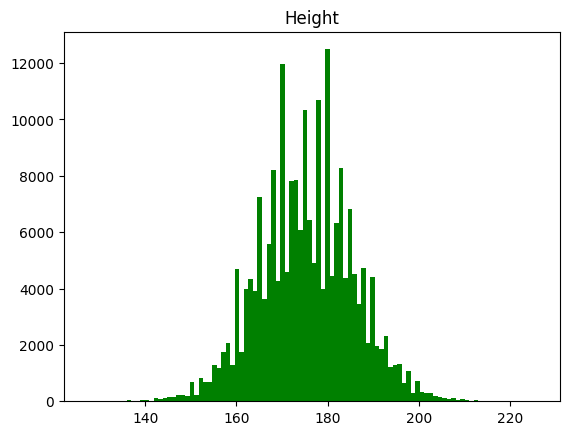

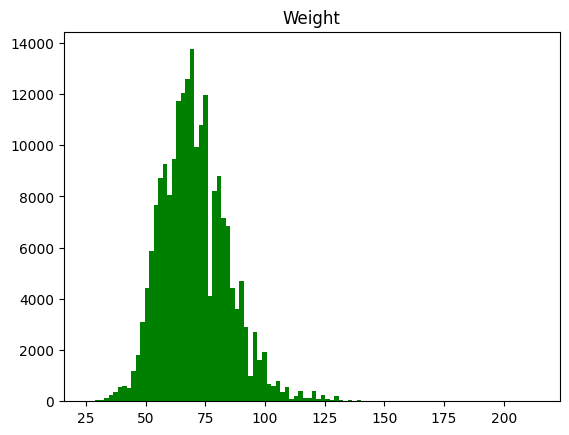

In [20]:
""" 
Missing data problem:
Remove athletes who have not won any medals from the dataset.
Fill the missing values in the Height and Weight columns with values based on the event.
However, it needs to be determined whether the median or the mean of the event should be used.
"""

# Visualizing the distribution of height data
plt.figure()
plt.hist(data.height, bins = 100, color = "green")
plt.title("Height")

# Visualizing the distribution of weight data
plt.figure()
plt.hist(data.weight, bins = 100, color = "green")
plt.title("Weight")

# Generating descriptive statistics for the dataset
data.describe()


In [24]:
# Filling missing values in the height and weight columns based on the mean of each event
# Identifying unique events in the dataset
unique_event = pd.unique(data.event) 
# Creating a copy of the dataset to preserve the original data
data_copy = data.copy()
height_weight_list = ["height", "weight"]

# Looping through each event to fill missing height and weight values
for e in unique_event:
    # Filtering the dataset for the current event
    event_filter = data_copy.event == e
    data_filtered = data_copy[event_filter]

    # Filling missing values in both height and weight
    for s in height_weight_list:
        mean = np.mean(data_filtered[s])

        # If the mean is not NaN, fill missing values with the mean of the event
        if np.isnan(mean) == False:
            data_filtered[s] = data_filtered[s].fillna(mean)
        else:
            # If the event mean is NaN, use the overall mean for the column
            all_data_mean = np.mean(data[s])
            data_filtered[s] = data_filtered[s].fillna(all_data_mean)
    # Updating the main dataset with the filled values
    data_copy[event_filter] = data_filtered
# Creating a final cleaned dataset
df = data_copy.copy()
df.info()

/var/folders/3r/lc8c1b_x0jz2cc2p36rfzzrm0000gn/T/ipykernel_38444/43596532.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[s] = data_filtered[s].fillna(mean)
/var/folders/3r/lc8c1b_x0jz2cc2p36rfzzrm0000gn/T/ipykernel_38444/43596532.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[s] = data_filtered[s].fillna(mean)
/var/folders/3r/lc8c1b_x0jz2cc2p36rfzzrm0000gn/T/ipykernel_38444/43596532.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   sex     271116 non-null  object 
 3   age     261642 non-null  float64
 4   height  271116 non-null  float64
 5   weight  271116 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   games   271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [29]:
# Filling missing values in the age column based on gender and sport
unique_sex = pd.unique(data.sex)
unique_sport = pd.unique(data.sport)
data_copy = data.copy()

# Looping through each combination of gender and sport
for c in unique_sex:
    for s in unique_sport:
        # Filtering the dataset for the current gender and sport
        sex_sport_filtered = np.logical_and(data_copy.sex == c, data_copy.sport == s)
        data_filtered = data_copy[sex_sport_filtered]
        
        # Filling missing age values with the mean for the gender and sport
        mean = np.mean(data_filtered["age"])

        if np.isnan(mean) == False:
            data_filtered["age"] = data_filtered["age"].fillna(mean)
        else:
            # If the gender-sport mean is NaN, use the overall mean for age
            all_data_mean = np.mean(data["age"])
            data_filtered["age"] = data_filtered["age"].fillna(all_data_mean)
        # Updating the main dataset with the filled values
        data_copy[sex_sport_filtered] = data_filtered
# Creating a final cleaned dataset
df = data_copy.copy()
df.info()

/var/folders/3r/lc8c1b_x0jz2cc2p36rfzzrm0000gn/T/ipykernel_38444/606921959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["age"] = data_filtered["age"].fillna(mean)
/var/folders/3r/lc8c1b_x0jz2cc2p36rfzzrm0000gn/T/ipykernel_38444/606921959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["age"] = data_filtered["age"].fillna(mean)
/var/folders/3r/lc8c1b_x0jz2cc2p36rfzzrm0000gn/T/ipykernel_38444/606921959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a co

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   sex     271116 non-null  object 
 3   age     271116 non-null  float64
 4   height  210945 non-null  float64
 5   weight  208241 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   games   271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [33]:
# Identifying athletes who did not win any medals
medal_var = data.medal
null_count = pd.isnull(medal_var).sum()  # Count of athletes without medals

# Filtering out athletes without medals
medal_var_filtered = pd.isnull(medal_var)
data = data[~medal_var_filtered]

# Displaying the first few rows of the filtered dataset
data.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
